In [57]:
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [5]:
commodities = pd.read_csv("Resources/commodity_futures.csv", index_col="Date")
commodities.head()

,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,LIVE CATTLE,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,456.50,200.75,NaN,NaN,NaN,69.700,...,1237.50,NaN,8446.0,247.50,6.10,NaN,116.50,55.975,274.25,51.07
2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,213.50,69.075,...,1215.00,67.78,8314.0,247.25,5.77,NaN,116.25,55.625,274.00,50.73
2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,213.00,68.975,...,1209.25,66.55,8307.0,249.75,5.81,NaN,118.60,55.075,276.25,51.56
2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,211.25,70.075,...,1212.00,66.28,8252.0,248.50,5.77,NaN,116.85,55.175,275.00,52.08
2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,205.25,70.875,...,1209.25,64.75,8174.0,251.75,5.84,NaN,114.15,55.625,277.75,53.96


In [6]:
new_commodities = commodities.fillna(0)
new_commodities

,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,LIVE CATTLE,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.000,0.0,0.00,0.00,456.50,200.75,0.0000,0.000,0.00,69.700,...,1237.50,0.00,8446.0,247.50,6.10,0.00,116.50,55.975,274.25,51.07
2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,213.50,69.075,...,1215.00,67.78,8314.0,247.25,5.77,0.00,116.25,55.625,274.00,50.73
2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,213.00,68.975,...,1209.25,66.55,8307.0,249.75,5.81,0.00,118.60,55.075,276.25,51.56
2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,211.25,70.075,...,1212.00,66.28,8252.0,248.50,5.77,0.00,116.85,55.175,275.00,52.08
2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,205.25,70.875,...,1209.25,64.75,8174.0,251.75,5.84,0.00,114.15,55.625,277.75,53.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-14,5.933,1776.9,85.87,93.14,1441.75,657.25,3.8335,22.113,991.75,151.575,...,3154.00,354.40,28767.0,818.50,19.83,252.85,166.20,84.875,956.25,85.28
2022-11-15,6.034,1776.8,86.92,93.86,1457.25,666.75,3.8200,21.518,990.25,151.275,...,3125.00,364.13,30176.0,828.25,20.29,251.61,156.75,85.325,963.00,88.74
2022-11-16,6.200,1775.8,85.59,92.86,1429.25,665.25,3.7735,21.524,991.75,151.800,...,3061.50,361.36,27441.0,817.50,20.27,250.80,155.45,85.575,955.50,88.44


In [25]:
eur_to_usd = 1.09
usd_commodities = new_commodities*eur_to_usd
usd_commodities

,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,LIVE CATTLE,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.00000,0.000,0.0000,0.0000,497.5850,218.8175,0.000000,0.00000,0.0000,75.97300,...,1348.8750,0.0000,9206.14,269.7750,6.6490,0.0000,126.9850,61.01275,298.9325,55.6663
2000-01-04,2.37184,309.233,27.8495,26.5851,506.0325,221.2700,0.924320,5.85875,232.7150,75.29175,...,1324.3500,73.8802,9062.26,269.5025,6.2893,0.0000,126.7125,60.63125,298.6600,55.2957
2000-01-05,2.36312,307.489,27.1519,25.8657,511.4825,221.2700,0.933585,5.67890,232.1700,75.18275,...,1318.0825,72.5395,9054.63,272.2275,6.3329,0.0000,129.2740,60.03175,301.1125,56.2004
2000-01-06,2.39364,307.816,27.0102,25.7458,510.1200,222.0875,0.929770,5.63203,230.2625,76.38175,...,1321.0800,72.2452,8994.68,270.8650,6.2893,0.0000,127.3665,60.14075,299.7500,56.7672
2000-01-07,2.36857,308.361,26.3998,25.1681,513.9350,225.6300,0.930860,5.66255,223.7225,77.25375,...,1318.0825,70.5775,8909.66,274.4075,6.3656,0.0000,124.4235,60.63125,302.7475,58.8164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-14,6.46697,1936.821,93.5983,101.5226,1571.5075,716.4025,4.178515,24.10317,1081.0075,165.21675,...,3437.8600,386.2960,31356.03,892.1650,21.6147,275.6065,181.1580,92.51375,1042.3125,92.9552
2022-11-15,6.57706,1936.712,94.7428,102.3074,1588.4025,726.7575,4.163800,23.45462,1079.3725,164.88975,...,3406.2500,396.9017,32891.84,902.7925,22.1161,274.2549,170.8575,93.00425,1049.6700,96.7266
2022-11-16,6.75800,1935.622,93.2931,101.2174,1557.8825,725.1225,4.113115,23.46116,1081.0075,165.46200,...,3337.0350,393.8824,29910.69,891.0750,22.0943,273.3720,169.4405,93.27675,1041.4950,96.3996


In [40]:
usd_commodities = usd_commodities.rename(columns={
    'NATURAL GAS':'Natural Gas (USD/MMBtu)',
    'GOLD':'Gold (USD/t oz)',
    'WTI CRUDE':'WTI Crude (USD/bbl)',
    'BRENT CRUDE':'Brent Crude (USD/bbl)',
    'SOYBEANS':'Soybeans (USD/bushel)',
    'CORN':'Corn (USD/bushel)',
    'COPPER':'Copper (USD/lb)',
    'SILVER':'Silver (USD/t oz)',
    'LOW SULPHUR GAS OIL':'Low Sulphur Gas Oil (USD/MT)',
    'LIVE CATTLE':'Live Cattle (USD/lb)',
    'SOYBEAN OIL':'Soybean Oil (USD/lb)',
    'ALUMINIUM':'Aluminum (USD/MT)',
    'SOYBEAN MEAL':'Soybean Meal (USD/T)',
    'ZINC':'Zinc (USD/MT)',
    'ULS DIESEL':'ULS Diesel (USD/gal)',
    'NICKEL':'Nickel (USD/MT)',
    'WHEAT':'Wheat (USD/bushel)',
    'SUGAR':'Sugar (USD/lb)',
    'GASOLINE':'Gasoline (USD/gal)',
    'COFFEE':'Coffee (USD/lb)',
    'LEAN HOGS':'Lean Hog (USD/lb)',
    'HRW WHEAT':'HRW Wheat (USD/bushel)',
    'COTTON':'Cotton (USD/lb)'
})
usd_commodities

,Natural Gas (USD/MMBtu),Gold (USD/t oz),WTI Crude (USD/bbl),Brent Crude (USD/bbl),Soybeans (USD/bushel),Corn (USD/bushel),Copper (USD/lb),Silver (USD/t oz),Low Sulphur Gas Oil (USD/MT),Live Cattle (USD/lb),...,Zinc (USD/MT),ULS Diesel (USD/gal),Nickel (USD/MT),Wheat (USD/bushel),Sugar (USD/lb),Gasoline (USD/gal),Coffee (USD/lb),Lean Hog (USD/lb),HRW Wheat (USD/bushel),Cotton (USD/lb)
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.00000,0.000,0.0000,0.0000,497.5850,218.8175,0.000000,0.00000,0.0000,75.97300,...,1348.8750,0.0000,9206.14,269.7750,6.6490,0.0000,126.9850,61.01275,298.9325,55.6663
2000-01-04,2.37184,309.233,27.8495,26.5851,506.0325,221.2700,0.924320,5.85875,232.7150,75.29175,...,1324.3500,73.8802,9062.26,269.5025,6.2893,0.0000,126.7125,60.63125,298.6600,55.2957
2000-01-05,2.36312,307.489,27.1519,25.8657,511.4825,221.2700,0.933585,5.67890,232.1700,75.18275,...,1318.0825,72.5395,9054.63,272.2275,6.3329,0.0000,129.2740,60.03175,301.1125,56.2004
2000-01-06,2.39364,307.816,27.0102,25.7458,510.1200,222.0875,0.929770,5.63203,230.2625,76.38175,...,1321.0800,72.2452,8994.68,270.8650,6.2893,0.0000,127.3665,60.14075,299.7500,56.7672
2000-01-07,2.36857,308.361,26.3998,25.1681,513.9350,225.6300,0.930860,5.66255,223.7225,77.25375,...,1318.0825,70.5775,8909.66,274.4075,6.3656,0.0000,124.4235,60.63125,302.7475,58.8164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-14,6.46697,1936.821,93.5983,101.5226,1571.5075,716.4025,4.178515,24.10317,1081.0075,165.21675,...,3437.8600,386.2960,31356.03,892.1650,21.6147,275.6065,181.1580,92.51375,1042.3125,92.9552
2022-11-15,6.57706,1936.712,94.7428,102.3074,1588.4025,726.7575,4.163800,23.45462,1079.3725,164.88975,...,3406.2500,396.9017,32891.84,902.7925,22.1161,274.2549,170.8575,93.00425,1049.6700,96.7266
2022-11-16,6.75800,1935.622,93.2931,101.2174,1557.8825,725.1225,4.113115,23.46116,1081.0075,165.46200,...,3337.0350,393.8824,29910.69,891.0750,22.0943,273.3720,169.4405,93.27675,1041.4950,96.3996


In [41]:
per_commodity = usd_commodities.agg(["mean", "median", "var", "std", "sem"])
per_commodity

,Natural Gas (USD/MMBtu),Gold (USD/t oz),WTI Crude (USD/bbl),Brent Crude (USD/bbl),Soybeans (USD/bushel),Corn (USD/bushel),Copper (USD/lb),Silver (USD/t oz),Low Sulphur Gas Oil (USD/MT),Live Cattle (USD/lb),...,Zinc (USD/MT),ULS Diesel (USD/gal),Nickel (USD/MT),Wheat (USD/bushel),Sugar (USD/lb),Gasoline (USD/gal),Coffee (USD/lb),Lean Hog (USD/lb),HRW Wheat (USD/bushel),Cotton (USD/lb)
mean,4.964871,1137.770818,68.118087,71.660508,1053.775212,432.813346,2.816028,17.331840,632.711237,114.213431,...,2252.736237,206.658028,1.736901e+04,570.164093,15.514875,172.503214,138.756788,78.385903,594.553535,77.358304
median,4.287515,1300.533500,65.002150,68.343000,1035.772500,399.757500,3.046823,17.546820,612.988750,111.834000,...,2246.762500,202.009700,1.583443e+04,544.455000,14.578750,187.877850,131.018000,74.705875,535.053750,71.629350
var,5.965030,321665.428819,813.591763,1034.367297,135557.298415,31506.210741,1.500969,85.329903,82536.131211,715.475855,...,857527.357495,8438.065073,7.072477e+07,43246.217912,39.647520,13626.540123,3067.581250,338.320593,48263.027694,772.112229
std,2.442341,567.155560,28.523530,32.161581,368.181067,177.499889,1.225140,9.237419,287.291022,26.748380,...,926.027730,91.858941,8.409802e+03,207.957250,6.296628,116.732772,55.385750,18.393493,219.688479,27.786908
sem,0.031775,7.378736,0.371093,0.418425,4.790063,2.309287,0.015939,0.120179,3.737677,0.347998,...,12.047689,1.195092,1.094121e+02,2.705539,0.081920,1.518702,0.720573,0.239301,2.858163,0.361510


<AxesSubplot:>

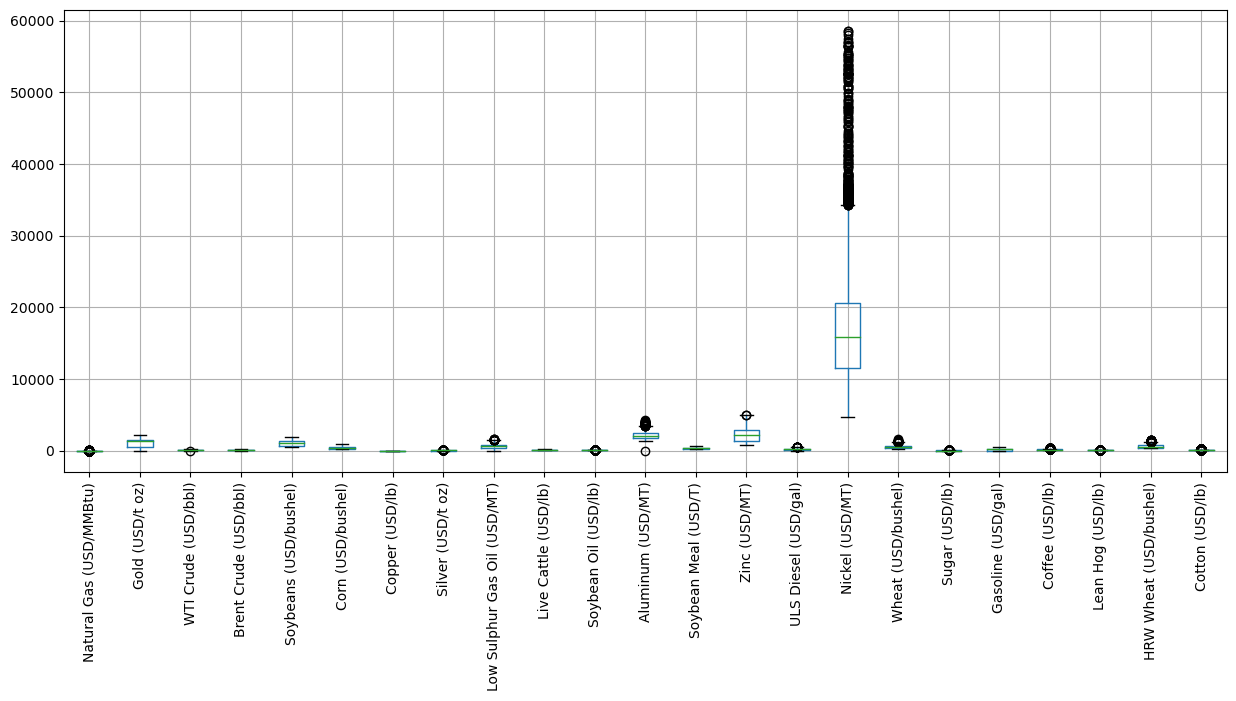

In [42]:
usd_commodities.boxplot(rot=90, figsize=(15,6))

<AxesSubplot:>

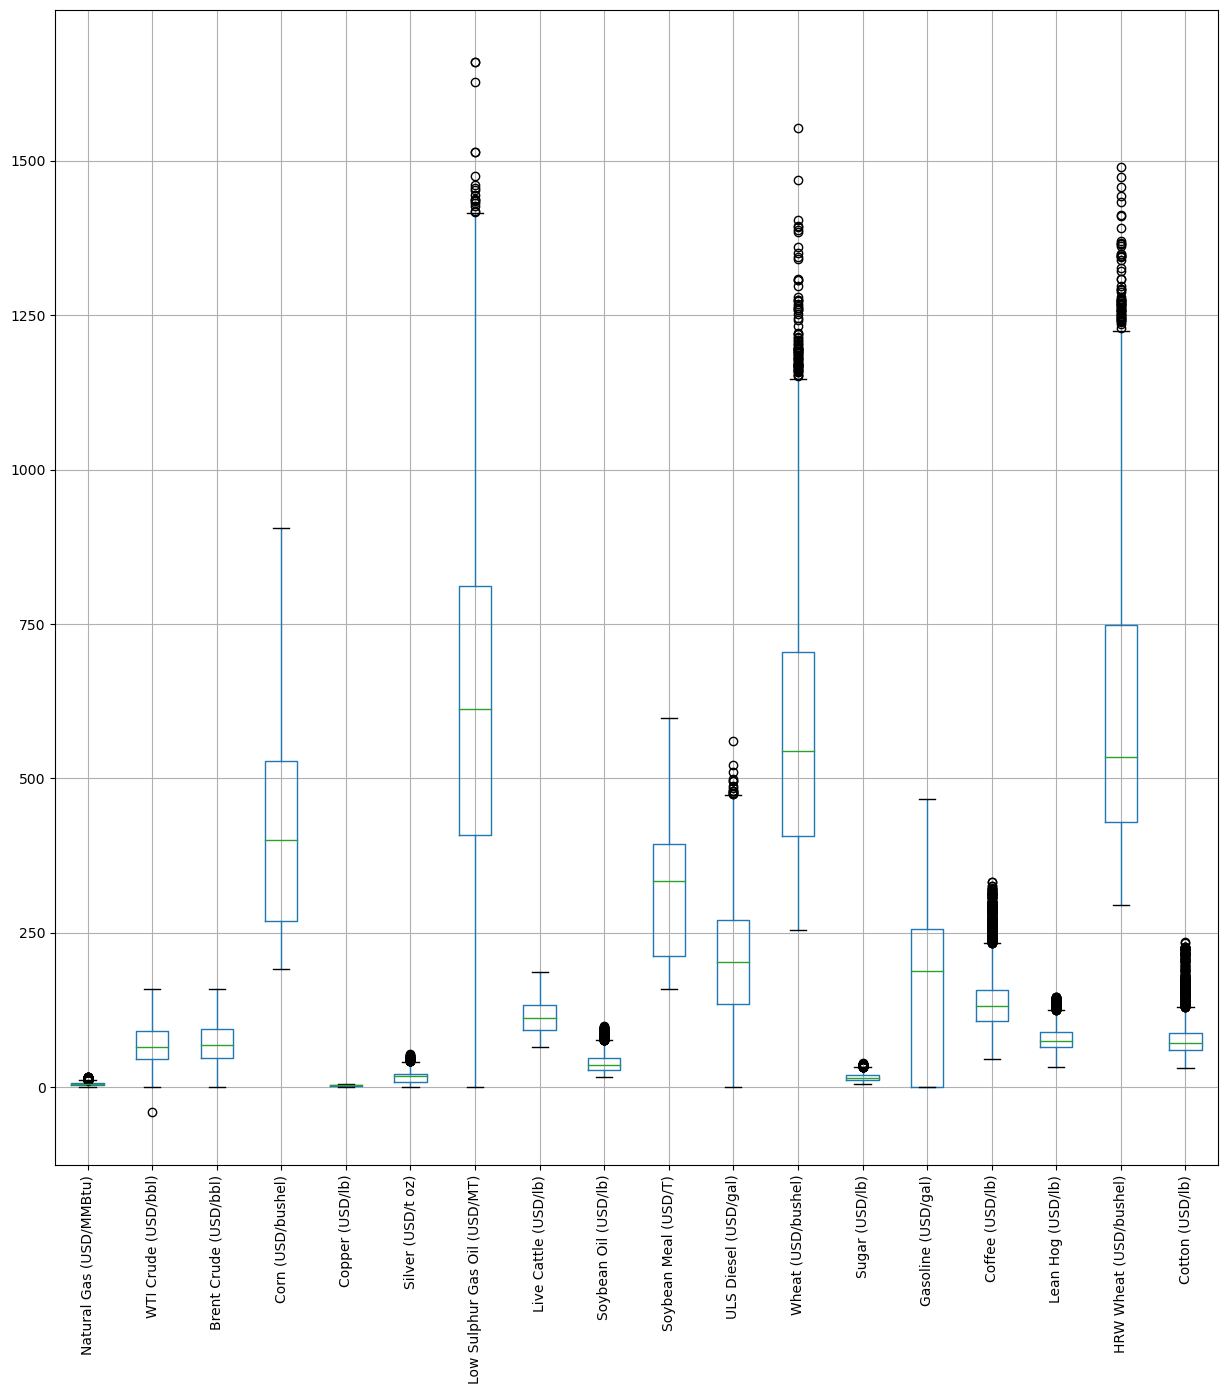

In [44]:
usd_commodities.drop(["Nickel (USD/MT)","Gold (USD/t oz)","Soybeans (USD/bushel)", "Aluminum (USD/MT)","Zinc (USD/MT)"],axis=1).boxplot(rot=90, figsize=(15,15))

In [45]:
energy = usd_commodities[['Natural Gas (USD/MMBtu)', 'Low Sulphur Gas Oil (USD/MT)', 'WTI Crude (USD/bbl)', 'Brent Crude (USD/bbl)', 'ULS Diesel (USD/gal)', 'Gasoline (USD/gal)']]
energy.head()

,Natural Gas (USD/MMBtu),Low Sulphur Gas Oil (USD/MT),WTI Crude (USD/bbl),Brent Crude (USD/bbl),ULS Diesel (USD/gal),Gasoline (USD/gal)
Date,,,,,,
2000-01-03,0.00000,0.0000,0.0000,0.0000,0.0000,0.0
2000-01-04,2.37184,232.7150,27.8495,26.5851,73.8802,0.0
2000-01-05,2.36312,232.1700,27.1519,25.8657,72.5395,0.0
2000-01-06,2.39364,230.2625,27.0102,25.7458,72.2452,0.0
2000-01-07,2.36857,223.7225,26.3998,25.1681,70.5775,0.0


In [46]:
coffee = usd_commodities[['Coffee (USD/lb)']]
coffee.head()

,Coffee (USD/lb)
Date,
2000-01-03,126.9850
2000-01-04,126.7125
2000-01-05,129.2740
2000-01-06,127.3665
2000-01-07,124.4235


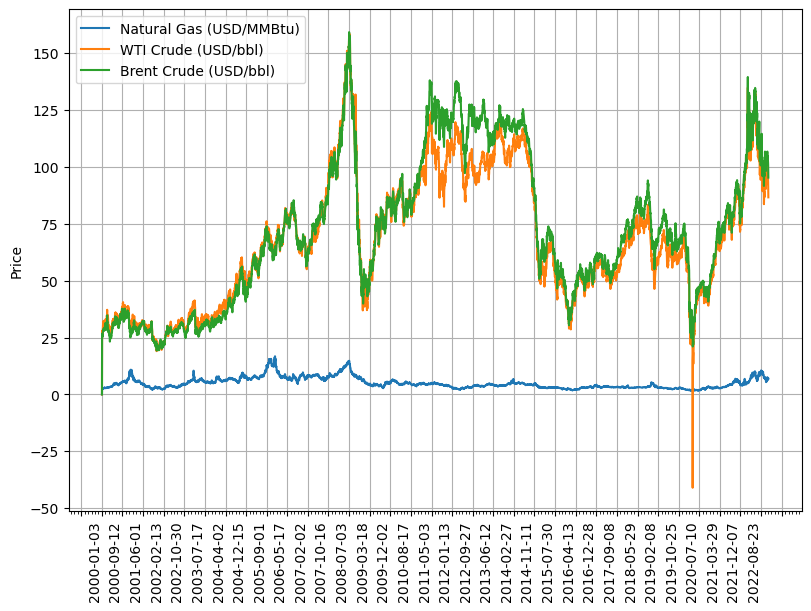

In [80]:
fig, axs = plt.subplots(figsize=(8,6), constrained_layout=True)
ax = plt.gca()
x = energy.index
ax.plot(x, energy["Natural Gas (USD/MMBtu)"], label="Natural Gas (USD/MMBtu)")
ax.plot(x, energy["WTI Crude (USD/bbl)"],label="WTI Crude (USD/bbl)")
ax.plot(x, energy["Brent Crude (USD/bbl)"],label="Brent Crude (USD/bbl)")
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=90, horizontalalignment='right')
ax.grid(True)
ax.set_ylabel('Price')
plt.legend()


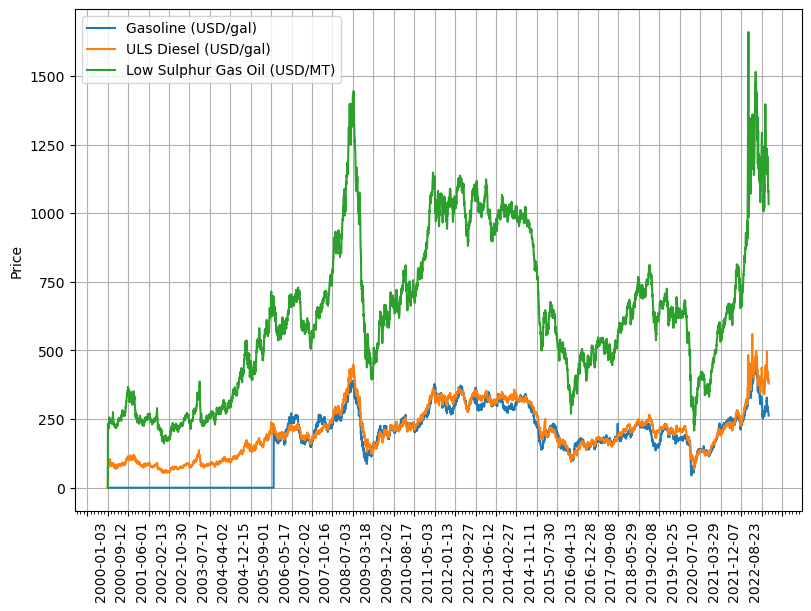

In [81]:
fig, axs = plt.subplots(figsize=(8,6), constrained_layout=True)
ax = plt.gca()
x = energy.index
ax.plot(x, energy["Gasoline (USD/gal)"], label="Gasoline (USD/gal)")
ax.plot(x, energy["ULS Diesel (USD/gal)"],label="ULS Diesel (USD/gal)")
ax.plot(x, energy["Low Sulphur Gas Oil (USD/MT)"],label="Low Sulphur Gas Oil (USD/MT)")
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=90, horizontalalignment='right')
ax.grid(True)
ax.set_ylabel('Price')
plt.legend()

<AxesSubplot:xlabel='Date'>

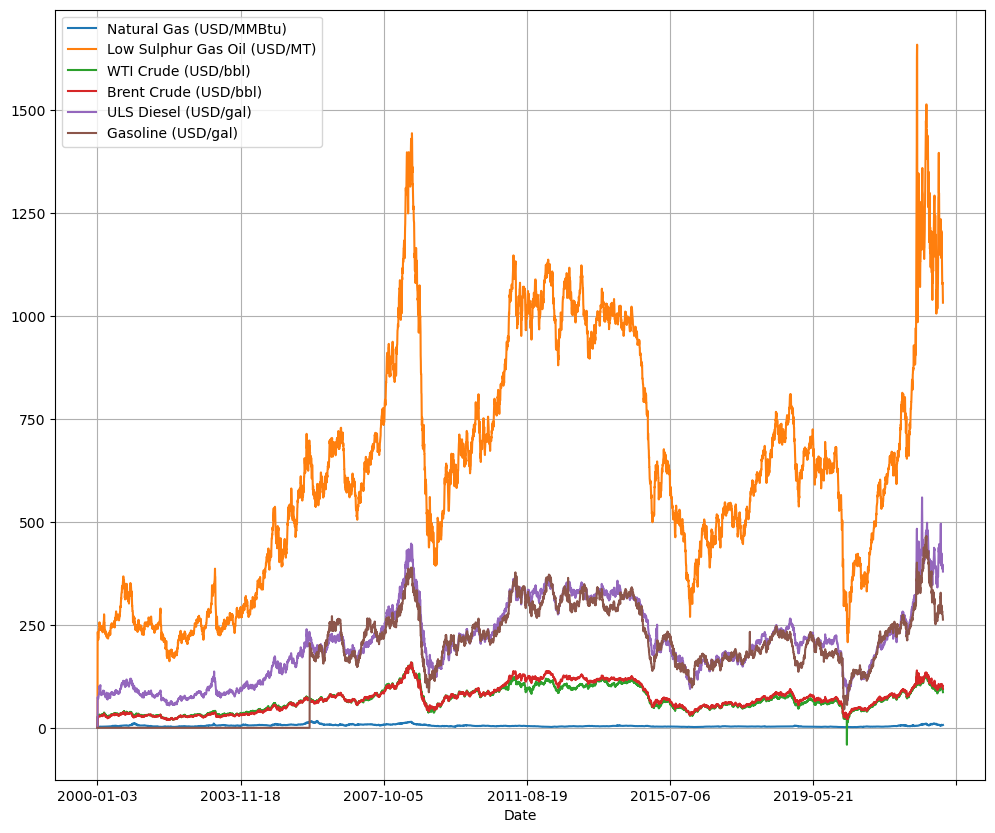

In [56]:
energy.plot.line(figsize=(12,10), grid=True)


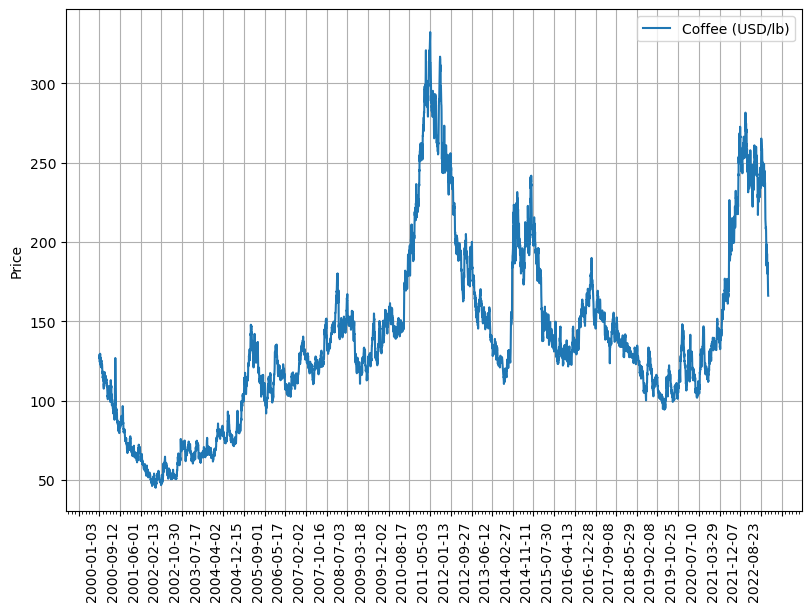

In [84]:
fig, axs = plt.subplots(figsize=(8,6), constrained_layout=True)
ax = plt.gca()
x = coffee.index
ax.plot(x, coffee["Coffee (USD/lb)"], label="Coffee (USD/lb)")
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=90, horizontalalignment='right')
ax.grid(True)
ax.set_ylabel('Price')
plt.legend()